In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

## 和上一次一样，先写一个通用的牛顿方法函数

In [147]:
steps=0
s=0
def NRM(fun,x0,errorArg=1e-6,m=1,procedure=False):
    '''
    # 牛顿方法（牛顿-拉弗森方法）
    ## 参数说明
        `fun`：需要求解的方程fun(x)==0
        `x0`：求解初始值
        `errorArg`：求解精度，默认为1e-6
        `m`：根的重述，默认为1
    '''
    global steps
    global s
    steps=0
    error=1
    error0=1
    print('        x              e(i)        e(i)/e(i-1)    e(i)/e(i-1)^2')
    while error>errorArg/2:
        x=x0-m*fun(x0)/derivative(fun,x0,dx=errorArg,order=7)
        error=np.abs(x-x0)
        if procedure==True:
            print('%16.8e%16.8e%16.8e%16.8e'%(x0,error,error/error0,error/error0**2))
        x0=x
        error0=error
        steps+=1
    return x0

## 编程 1.4-3(a)

In [9]:
def f(x):
    return 27*x**3+54*x**2+36*x+8

print("r=%.6f"%NRM(f,0,1e-6),"  Start at  0   steps=%d"%steps,"  S=%f"%s)

r=-0.666665   Start at  0   steps=32   S=0.000000


前向误差为1.66667e-6，后向误差为1.77636e-15

In [138]:
for i in range(4):
    print(i,derivative(f,-0.666665,dx=1e-6,n=i,order=7))


0 -0.22154935145037657
1 0.9585963447653577
2 -1.3483073164899384
3 -90.20562075079398


因此r为三重根，取m=3，再运行一次牛顿法

In [12]:
print("r=%.6f"%NRM(f,0,m=3),"  Start at  0   steps=%d"%steps,"  S=%f"%s)

r=-0.666667   Start at  0   steps=2   S=0.000000


前向误差为-3.33333e-7，后向误差为3.55271e-15

## 编程 1.4-7

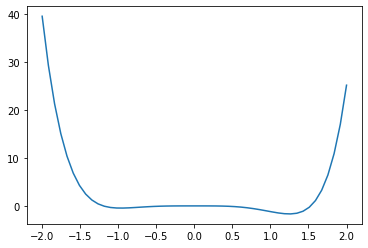

In [16]:
def f(x):
    return np.exp(np.sin(x)**3)+x**6-2*x**4-x**3-1

x=np.linspace(-2,2)
plt.plot(x,f(x))

In [148]:
print('r=%.6f'%NRM(f, -2,procedure=True),'steps=%d'%steps)

        x              e(i)        e(i)/e(i-1)    e(i)/e(i-1)^2
 -2.00000000e+00  2.80962561e-01  2.80962561e-01  2.80962561e-01
 -1.71903744e+00  2.18957868e-01  7.79313327e-01  2.77372659e+00
 -1.50007957e+00  1.58986950e-01  7.26107499e-01  3.31619733e+00
 -1.34109262e+00  9.75113400e-02  6.13329207e-01  3.85773302e+00
 -1.24358128e+00  3.95818637e-02  4.05920621e-01  4.16280425e+00
 -1.20399942e+00  6.23248843e-03  1.57458185e-01  3.97803869e+00
 -1.19776693e+00  1.43132081e-04  2.29654788e-02  3.68480088e+00
 -1.19762380e+00  7.42022772e-08  5.18418210e-04  3.62195678e+00
r=-1.197624 steps=8


此根为二次收敛

In [157]:
print('r=%.6f'%NRM(f, 0.1,procedure=True),'steps=%d'%steps)

        x              e(i)        e(i)/e(i-1)    e(i)/e(i-1)^2
  1.00000000e-01  2.49391330e-02  2.49391330e-02  2.49391330e-02
  7.50608670e-02  1.87178192e-02  7.50540093e-01  3.00948752e+01
  5.63430478e-02  1.40534498e-02  7.50805936e-01  4.01118276e+01
  4.22895981e-02  1.05517992e-02  7.50833384e-01  5.34269803e+01
  3.17377988e-02  7.92181947e-03  7.50755326e-01  7.11495082e+01
  2.38159794e-02  5.94645582e-03  7.50642682e-01  9.47563479e+01
  1.78695236e-02  4.46294818e-03  7.50522381e-01  1.26213396e+02
  1.34065754e-02  3.34906689e-03  7.50415813e-01  1.68143519e+02
  1.00575085e-02  2.51292302e-03  7.50335273e-01  2.24043084e+02
  7.54458548e-03  1.88534371e-03  7.50259238e-01  2.98560375e+02
  5.65924177e-03  1.41430982e-03  7.50160206e-01  3.97890423e+02
  4.24493195e-03  1.06084650e-03  7.50080701e-01  5.30351050e+02
  3.18408545e-03  7.96401573e-04  7.50722720e-01  7.07663849e+02
  2.38768387e-03  5.96707069e-04  7.49254006e-01  9.40799254e+02
  1.79097680e-03  4.472251

此根为线性收敛

In [165]:
for i in range(5):
    print(i,derivative(f,0.000075,dx=1e-8,n=i,order=7))

0 0.0
1 0.0
2 0.3330669073875469
3 -1.4791141972893968e-07
4 -4.440892098500627e+16


此根为4重根，令m=4

In [154]:
print('r=%.6f'%NRM(f, 0.2,m=4,procedure=True),'steps=%d'%steps)

        x              e(i)        e(i)/e(i-1)    e(i)/e(i-1)^2
  2.00000000e-01  2.00484349e-01  2.00484349e-01  2.00484349e-01
 -4.84348720e-04  5.03898305e-04  2.51340470e-03  1.25366629e-02
  1.95495847e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
r=0.000020 steps=3


In [122]:
print('r=%.6f'%NRM(f, 2,procedure=True),'steps=%d'%steps)

        x              e(i)        e(i)/e(i-1)    e(i)/e(i-1)^2
  2.00000000e+00  2.20724929e-01  2.20724929e-01  2.20724929e-01
  1.77927507e+00  1.49301500e-01  6.76414306e-01  3.06451250e+00
  1.62997357e+00  7.74779677e-02  5.18936298e-01  3.47576078e+00
  1.55249560e+00  2.09538090e-02  2.70448614e-01  3.49065188e+00
  1.53154179e+00  1.40228681e-03  6.69227638e-02  3.19382332e+00
  1.53013951e+00  5.99888233e-06  4.27792823e-03  3.05067994e+00
  1.53013351e+00  1.09397824e-10  1.82363677e-05  3.03996090e+00
r=1.530134 steps=7


此根为二次收敛

## 编程 1.4-9

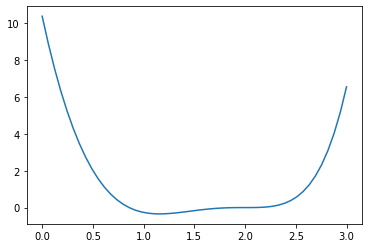

In [167]:
def f(x):
    return 12 - 12*np.exp(-2 + x) - 26*x + 14*np.exp(-2 + x)*x + 20*x**2 - 7*x**3

x=np.linspace(0,3)
plt.plot(x,f(x))

In [168]:
print('r=%.6f'%NRM(f, 1,procedure=True),'steps=%d'%steps)

        x              e(i)        e(i)/e(i-1)    e(i)/e(i-1)^2
  1.00000000e+00  2.37215416e-01  2.37215416e-01  2.37215416e-01
  7.62784584e-01  7.80371081e-02  3.28971487e-01  1.38680484e+00
  8.40821692e-01  1.57115301e-02  2.01334090e-01  2.57997887e+00
  8.56533222e-01  6.08739822e-04  3.87447827e-02  2.46600951e+00
  8.57141962e-01  8.95287712e-07  1.47072309e-03  2.41601262e+00
  8.57142857e-01  1.93578487e-12  2.16219305e-06  2.41508179e+00
r=0.857143 steps=6


In [193]:
print('S=%11.10f'%np.abs(derivative(f,0.857143,dx=1e-6,n=2,order=7)/derivative(f,0.857143,dx=1e-6,order=7)/2))

S=2.4141210712


此根为二次收敛，期望的M值与实际相近

In [169]:
print('r=%.6f'%NRM(f, 3,procedure=True),'steps=%d'%steps)

        x              e(i)        e(i)/e(i-1)    e(i)/e(i-1)^2
  3.00000000e+00  2.66149743e-01  2.66149743e-01  2.66149743e-01
  2.73385026e+00  2.04078383e-01  7.66780313e-01  2.88101091e+00
  2.52977187e+00  1.53106051e-01  7.50231595e-01  3.67619335e+00
  2.37666582e+00  1.12520242e-01  7.34917013e-01  4.80005205e+00
  2.26414558e+00  8.11146593e-02  7.20889488e-01  6.40675383e+00
  2.18303092e+00  5.74651431e-02  7.08443376e-01  8.73385134e+00
  2.12556578e+00  4.01042701e-02  6.97888632e-01  1.21445557e+01
  2.08546151e+00  2.76465501e-02  6.89366742e-01  1.71893601e+01
  2.05781496e+00  1.88769262e-02  6.82795003e-01  2.46972950e+01
  2.03893803e+00  1.27970310e-02  6.77919216e-01  3.59125849e+01
  2.02614100e+00  8.63046125e-03  6.74411216e-01  5.27006002e+01
  2.01751054e+00  5.79916963e-03  6.71942027e-01  7.78570238e+01
  2.01171137e+00  3.88688476e-03  6.70248503e-01  1.15576634e+02
  2.00782449e+00  2.60056935e-03  6.69062633e-01  1.72133385e+02
  2.00522392e+00  1.737920

此根为线性收敛

In [179]:
for i in range(4):
    print(i,derivative(f,2.000002,dx=1e-6,n=i,order=7))

0 1.4210854715202004e-14
1 4.026408835973901e-09
2 -0.03671137468093851
3 -26645.352591003706


此根为3重根，m=3，S=2/3，期望的S值与实际相近

In [183]:
print('r=%.6f'%NRM(f, 3,m=3,procedure=True),'steps=%d'%steps)

        x              e(i)        e(i)/e(i-1)    e(i)/e(i-1)^2
  3.00000000e+00  7.98449228e-01  7.98449228e-01  7.98449228e-01
  2.20155077e+00  1.88844405e-01  2.36513981e-01  2.96216681e-01
  2.01270637e+00  1.26466280e-02  6.69685077e-02  3.54622672e-01
  2.00005974e+00  5.62500000e-05  4.44782594e-03  3.51700543e-01
  2.00000349e+00  5.53846154e-06  9.84615385e-02  1.75042735e+03
  1.99999795e+00  4.00000000e-06  7.22222222e-01  1.30401235e+05
  1.99999395e+00  3.82978723e-06  9.57446809e-01  2.39361702e+05
  1.99999012e+00  4.09090909e-06  1.06818182e+00  2.78914141e+05
  1.99998603e+00  6.66666667e-06  1.62962963e+00  3.98353909e+05
  1.99997936e+00  8.30769231e-06  1.24615385e+00  1.86923077e+05
  1.99998767e+00  1.92857143e-05  2.32142857e+00  2.79431217e+05
  2.00000696e+00  1.02857143e-05  5.33333333e-01  2.76543210e+04
  2.00001724e+00  3.37500000e-05  3.28125000e+00  3.19010417e+05
  2.00005099e+00  3.26086957e-05  9.66183575e-01  2.86276615e+04
  2.00001838e+00  3.243243